# PCA Beispiel für den Iris Datensatz

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

### Implementation vom PCA

In [2]:
def pca (data, d):
    #Berechnung der Kovarianz-Matrix der Daten
    cov = np.cov(data.T)

    #Eigenwert Zerlegung
    eigen_values, eigen_vectors = np.linalg.eigh(cov)

    #Sortierung der Eigenwerte und -vektoren
    order = np.flip(eigen_values.argsort())
    eigen_vectors = eigen_vectors[:,order]

    #Auswahl der d größten Eigenvektoren
    Q = eigen_vectors[:,:d]
    
    #Ausgabe der transformierten Daten
    return data @ Q

### Laden des Iris Datasatzes
Der Iris Datensatz enthält Daten über die Blüten von "Iris Setosa", "Iris Versicolor" und "Iris Virginica". Insgesamt liegen 150 Datenpunkte vor, wobei jede Art an Iris dabei 50 Mal vertreten ist. Die Datenpunkte sind 4 Dimensional, sie enthalten Informationen über die "Sepal Width", "Sepal Length", "Petal Width" und "Petal Length".

In [3]:
iris = load_iris()
data = iris.data
iris_type = iris.target_names
iris_features = iris.feature_names

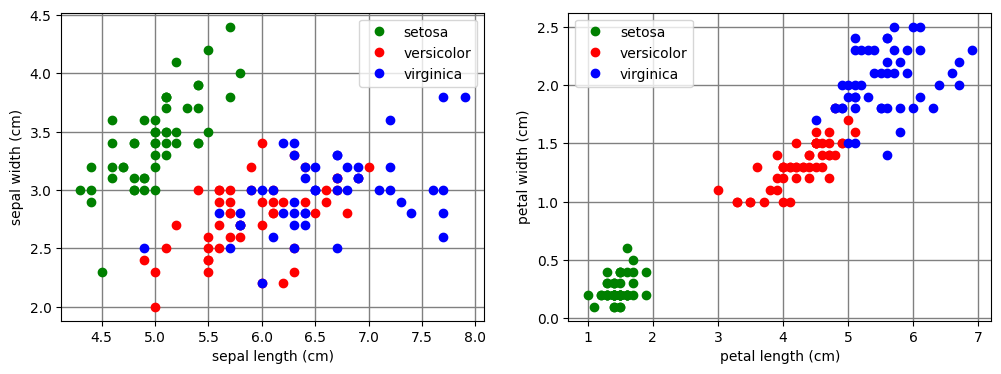

In [4]:
data_setosa = data[0:50]
data_versicolor = data[50:100]
data_virginica = data[100:150]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(data_setosa.T[0], data_setosa.T[1],"o", c = "green", label = iris_type[0])
ax1.plot(data_versicolor.T[0], data_versicolor.T[1],"o", c = "red", label = iris_type[1])
ax1.plot(data_virginica.T[0], data_virginica.T[1],"o", c = "blue", label = iris_type[2])
ax2.plot(data_setosa.T[2], data_setosa.T[3],"o", c = "green", label = iris_type[0])
ax2.plot(data_versicolor.T[2], data_versicolor.T[3],"o", c = "red", label = iris_type[1])
ax2.plot(data_virginica.T[2], data_virginica.T[3],"o", c = "blue", label = iris_type[2])

ax1.set_xlabel(iris_features[0])
ax1.set_ylabel(iris_features[1])
ax2.set_xlabel(iris_features[2])
ax2.set_ylabel(iris_features[3])

ax1.grid(color='gray', linestyle='-', linewidth=1)
ax2.grid(color='gray', linestyle='-', linewidth=1)

ax1.legend()
ax2.legend()

### PCA auf 2 Dimensionen

In [5]:
d = 2
pca_data = pca(data, d)

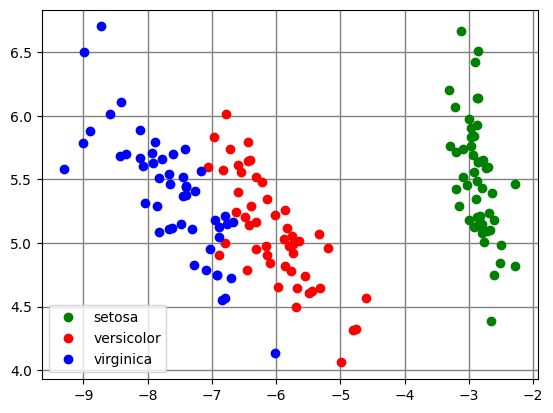

In [6]:
data_setosa = pca_data[0:50]
data_versicolor = pca_data[50:100]
data_virginica = pca_data[100:150]

plt.plot(data_setosa.T[0], data_setosa.T[1],"o", c = "green", label = iris_type[0])
plt.plot(data_versicolor.T[0], data_versicolor.T[1],"o", c = "red", label = iris_type[1])
plt.plot(data_virginica.T[0], data_virginica.T[1],"o", c = "blue", label = iris_type[2])

plt.grid(color='gray', linestyle='-', linewidth=1)
plt.legend()

### PCA auf 1 Dimension

In [7]:
d = 1
pca_data = pca(data, d)

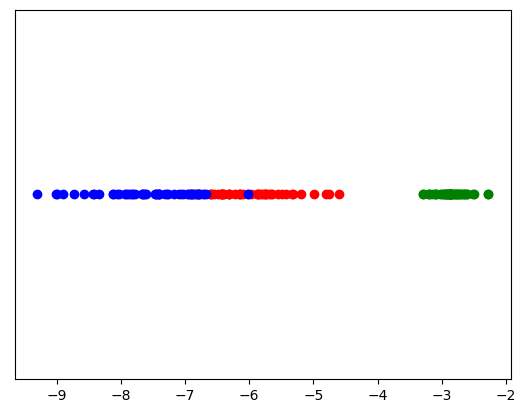

In [8]:
data_setosa = pca_data[0:50]
data_versicolor = pca_data[50:100]
data_virginica = pca_data[100:150]

plt.plot(data_setosa, np.zeros(50),"o", c = "green", label = iris_type[0])
plt.plot(data_versicolor, np.zeros(50),"o", c = "red", label = iris_type[1])
plt.plot(data_virginica, np.zeros(50),"o", c = "blue", label = iris_type[2])
frame = plt.gca()
frame.axes.get_yaxis().set_visible(False)
plt.show()

### PCA auf 2 Dimension mit Standardisierung
Es ist möglich vor der Anwendung von PCA noch zusätzliche Standardisierung durchzuführen, um das Ergebnis zu verbessern. Im folgenden werden die Daten nur um den Nullpunkt zentriert, welches auch zu einem zentrierten Ergebnis nach der Anwendung von PCA führt. Üblich ist es auch zusätzlich die Standardabweichung der Daten durch Skalierung um den Nullpunkt auf 1 zu setzen.

In [9]:
def standardize_data (data):
    return(data - data.mean(axis = 0))

In [10]:
#PCA mit Standardisierung der Daten
d = 2
std_data = standardize_data(data)
pca_data = pca(std_data, d)

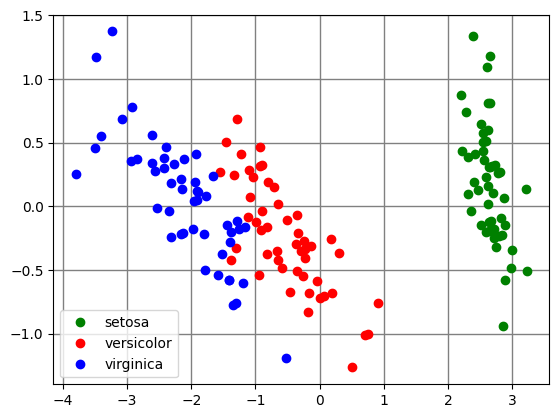

In [11]:
data_setosa = pca_data[0:50]
data_versicolor = pca_data[50:100]
data_virginica = pca_data[100:150]

plt.plot(data_setosa.T[0], data_setosa.T[1],"o", c = "green", label = iris_type[0])
plt.plot(data_versicolor.T[0], data_versicolor.T[1],"o", c = "red", label = iris_type[1])
plt.plot(data_virginica.T[0], data_virginica.T[1],"o", c = "blue", label = iris_type[2])

plt.grid(color='gray', linestyle='-', linewidth=1)
plt.legend()